In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns
import geopandas as gpd

plt.style.use('ggplot')
pd.set_option('display.max_columns', 30)

In [2]:
# import trip data
df = pd.read_csv('data/citibike_ZIP.csv')

In [3]:
# import zipcode shapefile
zip_shp = gpd.read_file('nyc_zip/ZIP_CODE_040114.shp')
zip_shp['ZIPCODE'] = zip_shp['ZIPCODE'].astype(int)

In [26]:
# group trips by start and end zipcode
start_trips = df.groupby(['zip_start','zip_end'], as_index = False)[['bikeid']].count().\
    rename(columns = {'bikeid': 'count'})
start_trips['daily_avg'] = start_trips['count']/30
top10_trips = start_trips.sort_values(by = 'daily_avg', ascending = False).head(5)
top10_trips

,zip_start,zip_end,count,daily_avg
3341,11201,11201.0,24827,827.566667
144,10002,10002.0,23012,767.066667
0,83,83.0,19924,664.133333
623,10011,10011.0,16892,563.066667
215,10003,10003.0,16352,545.066667


In [5]:
# find trips that start and end in different zipcodes
trips_crosszip = df[df['zip_start'] != df['zip_end']].\
groupby(['zip_start','zip_end'], as_index = False)[['bikeid']].count().\
    rename(columns = {'bikeid': 'count'})
trips_crosszip['daily_avg'] = trips_crosszip['count']/28
top10_crosstrips = trips_crosszip.sort_values(by = 'daily_avg', ascending = False).head(6)
top10_crosstrips

,zip_start,zip_end,count,daily_avg
215,10003,10009.0,9328,333.142857
469,10009,10003.0,9122,325.785714
820,10014,10011.0,8533,304.750000
616,10011,10014.0,8292,296.142857
146,10002,10009.0,7623,272.250000
468,10009,10002.0,7612,271.857143


[]

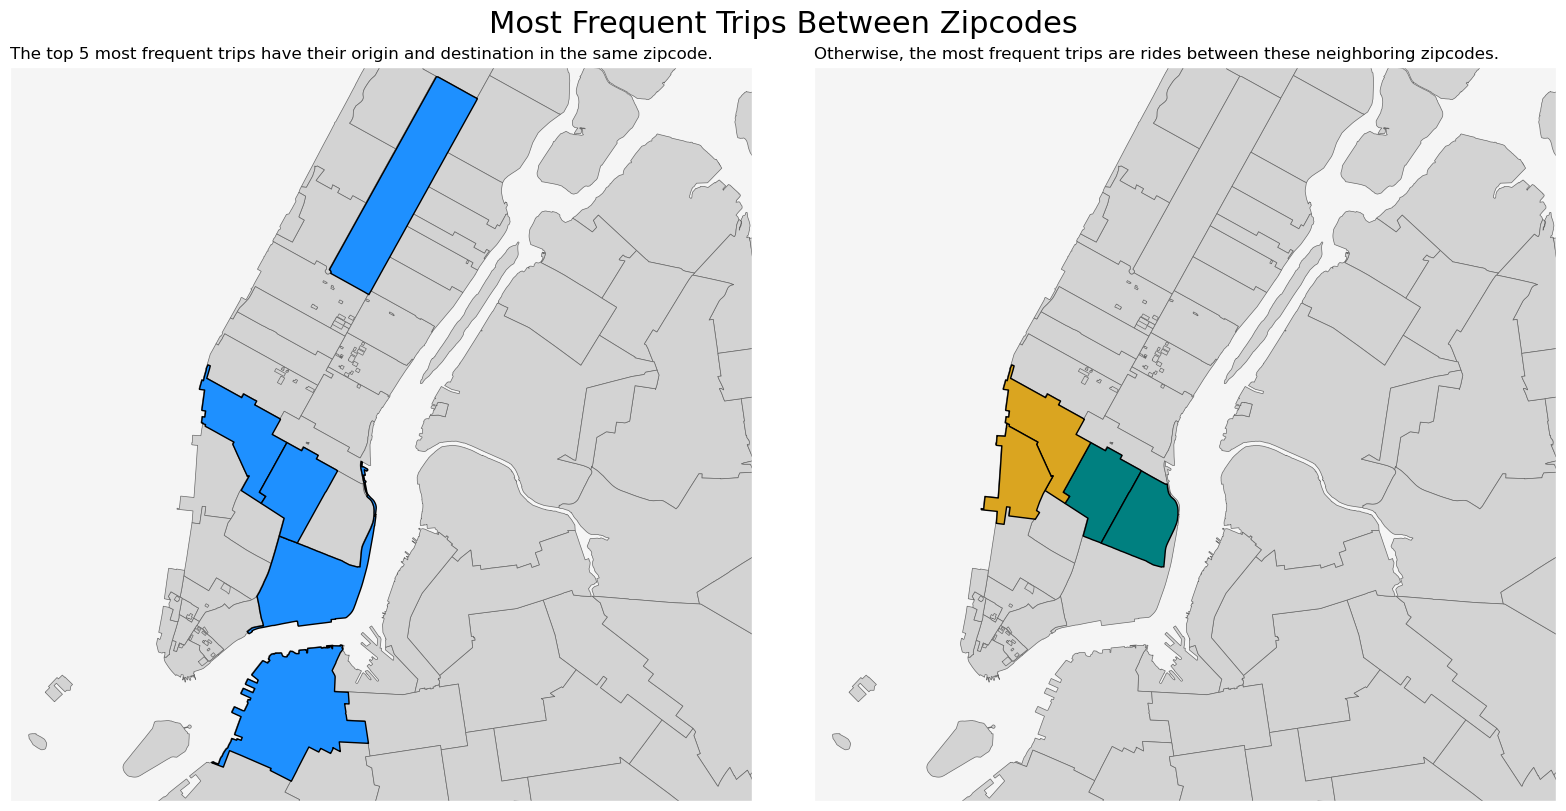

In [9]:
# maps depicting most frequent trip paths between zipcodes

fig, (ax1, ax2) = plt.subplots(1,2, 
                        figsize=(16, 8),
                        sharex=False,
                        sharey=False,
                        constrained_layout=True)

fig.suptitle('Most Frequent Trips Between Zipcodes', fontsize=22)

zip_shp.plot(ax=ax1, color='lightgrey', edgecolor = 'dimgray')
zip_shp.loc[zip_shp['ZIPCODE'] == 11201].plot(ax=ax1, facecolor='dodgerblue', edgecolor='black', linewidth=1)
zip_shp.loc[zip_shp['ZIPCODE'] == 10002].plot(ax=ax1, facecolor='dodgerblue', edgecolor='black', linewidth=1)
zip_shp.loc[zip_shp['ZIPCODE'] == 83].plot(ax=ax1, facecolor='dodgerblue', edgecolor='black', linewidth=1)
zip_shp.loc[zip_shp['ZIPCODE'] == 10011].plot(ax=ax1, facecolor='dodgerblue', edgecolor='black', linewidth=1)
zip_shp.loc[zip_shp['ZIPCODE'] == 10003].plot(ax=ax1, facecolor='dodgerblue', edgecolor='black', linewidth=1)


ax1.set_title(label ='The top 5 most frequent trips have their origin and destination in the same zipcode.',
              loc='left', fontsize = 12)
ax1.set_xlim(970000, 1015000)
ax1.set_ylim(187000, 231500)
ax1.set_facecolor("whitesmoke")
ax1.grid(False)
ax1.set_xticks([])
ax1.set_yticks([])

ax2.set_title(label = 'Otherwise, the most frequent trips are rides between these neighboring zipcodes.',
             loc='left', fontsize = 12)
zip_shp.plot(ax=ax2, color='lightgrey', edgecolor = 'dimgray')
zip_shp.loc[zip_shp['ZIPCODE'] == 10003].plot(ax=ax2, facecolor='teal', edgecolor='black', linewidth=1)
zip_shp.loc[zip_shp['ZIPCODE'] == 10009].plot(ax=ax2, facecolor='teal', edgecolor='black', linewidth=1)

zip_shp.loc[zip_shp['ZIPCODE'] == 10011].plot(ax=ax2, facecolor='goldenrod', edgecolor='black', linewidth=1)
zip_shp.loc[zip_shp['ZIPCODE'] == 10014].plot(ax=ax2, facecolor='goldenrod', edgecolor='black', linewidth=1)


ax2.set_xlim(970000, 1015000)
ax2.set_ylim(187000, 231500)
ax2.set_facecolor("whitesmoke")
ax2.grid(False)
ax2.set_xticks([])
ax2.set_yticks([])